In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset about prices

In [2]:
df_prices = pd.read_csv('../data/item_prices.csv')
df_calendar = pd.read_csv("./data/df_calendar_clean.csv") #only for the dates

## Start to clean __df prices__

In [4]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [5]:
print(df_prices.shape)
df_prices.head(1)

(6965706, 5)


,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414


## Drop duplicated

In [3]:
df_prices[df_prices.duplicated(keep=False)]
df_prices.drop_duplicates(inplace=True)

## Delete nulls

In [4]:
df_prices.isnull().sum()

item              0
category          0
store_code        0
yearweek      31800
sell_price        0
dtype: int64

### Nulls represent 0.4% of total, then we delete

In [5]:
df_prices.dropna(inplace=True)

### I filter with groupby, for _items_ for cluster

In [9]:
df_new_price = df_prices.groupby(['item']).agg(
    price_min = ('sell_price', 'min'),
    price_max = ('sell_price', 'max'),
    price_mean = ('sell_price', 'mean')
).reset_index()
print(df_new_price.shape)
df_new_price.head(5)

(3049, 4)


,item,price_min,price_max,price_mean
0,ACCESORIES_1_001,6.6500,12.7414,11.032755
1,ACCESORIES_1_002,2.6600,5.2801,5.275708
2,ACCESORIES_1_003,1.2502,7.9401,3.944125
3,ACCESORIES_1_004,5.0141,6.1712,5.983299
4,ACCESORIES_1_005,1.9950,4.0964,3.832119


In [10]:
# file_name = "df_price_cluster.csv"
# df_new_price .to_csv(file_name)

In [36]:
df_prices

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858
...,...,...,...,...,...
6965693,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201613.0,1.2000
6965694,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201614.0,1.2000
6965695,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201615.0,1.2000
6965696,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201616.0,1.2000


<Axes: ylabel='sell_price'>

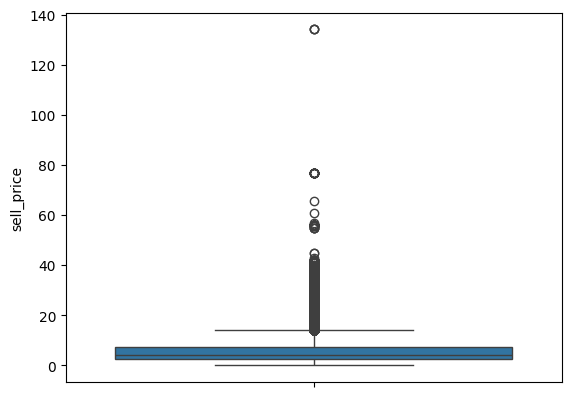

In [10]:
sns.boxplot(data=df_prices['sell_price'])

In [12]:
df_prices[df_prices['sell_price']>80] #only we see 3 values, don´t impact in the dataset.

,item,category,store_code,yearweek,sell_price
6604082,HOME_&_GARDEN_2_406,HOME_&_GARDEN,PHI_3,201320.0,134.15
6604083,HOME_&_GARDEN_2_406,HOME_&_GARDEN,PHI_3,201321.0,134.15
6604084,HOME_&_GARDEN_2_406,HOME_&_GARDEN,PHI_3,201322.0,134.15


### Create a new list of date for do merge with df_prices

In [6]:
start_date = df_calendar['date'].min()
end_date = df_calendar['date'].max()

In [7]:
def create_yearweek_df(start_date_str, end_date_str, initial_week):
    #Convertir las cadenas de fecha a objetos datetime
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)

    # Generar el rango de fechas
    date_range = pd.date_range(start_date, end_date)
    df = pd.DataFrame(date_range, columns=['date'])

    # Calcular el número de días desde la fecha de inicio
    df['dias_desde_inicio'] = (df['date'] - start_date).dt.days

    # Calcular el número de la semana ajustado desde la fecha inicial
    df['week_number'] = ((df['dias_desde_inicio'] // 7) + initial_week).astype(int)

    # Crear una columna 'yearweek' que combine el año y la semana
    df['year'] = df['date'].dt.year
    df['yearweek'] = df['year'].astype(str) + df['week_number'].apply(lambda x: f"{x:02d}")

    # Eliminar las columnas auxiliares
    df.drop(['dias_desde_inicio', 'week_number', 'year'], axis=1, inplace=True)

    return df

    # Crear DataFrames para cada año
df_2011 = create_yearweek_df('2011-01-29', '2011-12-30', 5)
df_2012_1 = create_yearweek_df('2011-12-31', '2012-01-01', 0)
df_2012 = create_yearweek_df('2012-01-02', '2012-12-30', 1)
df_2012_53 = pd.DataFrame([['2012-12-31','201253']],columns=['date','yearweek'])
df_2013 = create_yearweek_df('2013-01-01', '2013-12-31', 0)
df_2014 = create_yearweek_df('2014-01-01', '2014-12-31', 0)
df_2015 = create_yearweek_df('2015-01-01', '2015-12-31', 0)
df_2016_1 = create_yearweek_df('2016-01-01', '2016-01-02', 0)
df_2016 = create_yearweek_df('2016-01-03', '2016-04-24', 1)

df_2012_1.loc[0,'yearweek']='201152'

all_years_df = pd.concat([df_2011, df_2012_1, df_2012, df_2012_53, df_2013, df_2014, df_2015,df_2016_1, df_2016]).reset_index(drop=True)

all_years_df['date']= pd.to_datetime(all_years_df['date'], format='%Y-%m-%d')
all_years_df['yearweek'] = all_years_df['yearweek'].astype(str)
all_years_df.sample(2)

,date,yearweek
249,2011-10-05,201140
56,2011-03-26,201113


In [8]:
df_prices['yearweek'] = df_prices['yearweek'].astype(str).apply(lambda x: x[:-2])
df_prices.sample()

,item,category,store_code,yearweek,sell_price
2064789,SUPERMARKET_3_820,SUPERMARKET,NYC_3,201129,2.376


### I do merge df_prices with list of dates

In [9]:
df_merge_price_with_dates = df_prices.merge(all_years_df, on=['yearweek'], how='left')

In [10]:
print(df_merge_price_with_dates.shape)
df_merge_price_with_dates.head()

(45986376, 6)


,item,category,store_code,yearweek,sell_price,date
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328,12.7414,2013-07-16
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201328,12.7414,2013-07-17
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201328,12.7414,2013-07-18
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201328,12.7414,2013-07-19
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201328,12.7414,2013-07-20


In [11]:
df_merge_price_with_dates.set_index('date', inplace=True) 

## I group using resample for we have the dataset in mounths

In [53]:
df_prices_clean = df_merge_price_with_dates.groupby(['item', 'store_code'])['sell_price'].resample('M').mean().reset_index()

C:\Users\rafas\AppData\Local\Temp\ipykernel_440\549514265.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_prices = df_merge.groupby(['item', 'store_code'])['sell_price'].resample('M').mean().reset_index()


In [17]:
df_prices_clean.head()

,item,store_code,date,sell_price
0,ACCESORIES_1_001,BOS_1,2013-07-31,11.753875
1,ACCESORIES_1_001,BOS_1,2013-08-31,10.985800
2,ACCESORIES_1_001,BOS_1,2013-09-30,10.985800
3,ACCESORIES_1_001,BOS_1,2013-10-31,10.985800
4,ACCESORIES_1_001,BOS_1,2013-11-30,10.985800


In [18]:
file_name = "price_clean.csv"
df_prices_clean.to_csv(file_name)